# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Nama : Efitri Apriliyan Senitawati


- Batch : 015


- Objective : Membuat Prediksi default_payment_next_month dengan Beberapa Model Classification

- Dataset : Dataset diambil dari bigquery-public-data.ml_datasets.credit_card_default


dengan menggunakan query sebagai berikut:


SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 


FROM `bigquery-public-data.ml_datasets.credit_card_default` 


LIMIT 29850

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.



In [1]:
# Library yang digunakan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#Library data preprocessing dan algoritma model yang dipakai
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

#library untuk evaluasi model
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import json
import warnings
warnings.simplefilter("ignore")

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Data
df = pd.read_csv("h8dsft_P1M1_Efitri_Apriliyan.csv")

In [3]:
# Menampilkan 10 data awal
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
5,20000.0,1,1,2,29.0,0.0,0.0,2.0,0.0,0,...,17368.0,17959.0,19023.0,3170.0,0.0,1000.0,1000.0,3000.0,0.0,0
6,220000.0,1,1,2,38.0,0.0,0.0,0.0,0.0,0,...,198681.0,202479.0,206221.0,7705.0,9656.0,7189.0,7404.0,7490.0,7517.0,0
7,50000.0,1,1,1,42.0,0.0,0.0,0.0,0.0,0,...,29664.0,29057.0,29083.0,1850.0,1507.0,1100.0,1200.0,1116.0,2900.0,0
8,170000.0,1,1,1,41.0,0.0,0.0,0.0,0.0,0,...,76149.0,84474.0,92400.0,3200.0,6000.0,5000.0,10000.0,10000.0,780.0,0
9,50000.0,2,1,2,24.0,0.0,0.0,2.0,0.0,0,...,32140.0,32216.0,31482.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0,0


In [ ]:
# Duplicate Dataset

df_copy = df.copy()

In [ ]:
# Menampilkan 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,160000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2941.0,0.0,0.0,0.0,0.0,0.0,0
2956,260000.0,2,2,2,26.0,-1.0,-1.0,-2.0,-2.0,-2,...,-920.0,-1236.0,-1552.0,288.0,1236.0,316.0,316.0,316.0,316.0,0
2957,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2958,90000.0,2,1,1,44.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2959,80000.0,2,2,2,45.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,83750.0,0.0,0.0,0.0,0.0,0.0,0
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Mengecek Dataset -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Terdapat 2965 baris data dan 24 kolom, dengan 18 kolom tipe data float dan 6 kolom tipe data integer.

In [ ]:
# Mengecek Dataset -2
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
# Melihat ada berapa macam 'limit balance'
df['limit_balance'].nunique()

59

Terdapat 59 jenis limit balance kartu kredit, dengan masing-masing limit terlihat pada kolom di bawah.

In [ ]:
# Melihat berapa saja 'limit balance' yang ada
df['limit_balance'].unique()

array([ 50000., 110000., 270000., 130000.,  20000., 220000., 170000.,
       120000., 230000., 360000.,  60000., 100000., 150000.,  30000.,
       320000., 200000., 500000.,  80000., 140000.,  70000., 350000.,
        40000.,  90000., 400000., 180000., 240000., 300000., 330000.,
        10000., 420000., 250000., 260000., 380000., 210000., 470000.,
       460000., 290000., 160000., 780000., 310000., 280000., 390000.,
       530000., 340000., 510000., 410000., 190000., 480000., 680000.,
       490000., 430000., 370000., 440000., 700000., 560000., 750000.,
       450000., 800000., 620000.])

In [ ]:
#Melihat Jumlah Nasabah pada Masing - Masing 'Limit Balance'
df['limit_balance'].value_counts()

50000.0     348
20000.0     203
200000.0    150
30000.0     148
80000.0     145
100000.0    123
150000.0    122
180000.0     97
210000.0     84
140000.0     83
120000.0     80
360000.0     78
70000.0      76
90000.0      71
260000.0     70
130000.0     69
60000.0      68
230000.0     68
300000.0     67
160000.0     62
500000.0     56
240000.0     56
110000.0     54
170000.0     52
280000.0     50
10000.0      46
220000.0     43
290000.0     37
320000.0     32
310000.0     28
250000.0     28
40000.0      26
400000.0     25
350000.0     24
420000.0     20
270000.0     19
380000.0     16
330000.0     16
390000.0     16
340000.0     15
410000.0     12
190000.0     12
450000.0      9
460000.0      8
490000.0      8
370000.0      8
470000.0      7
440000.0      6
430000.0      5
480000.0      5
510000.0      4
530000.0      3
680000.0      1
700000.0      1
560000.0      1
750000.0      1
780000.0      1
800000.0      1
620000.0      1
Name: limit_balance, dtype: int64

Text(0.5, 1.0, 'Number of amount from limit_balance')

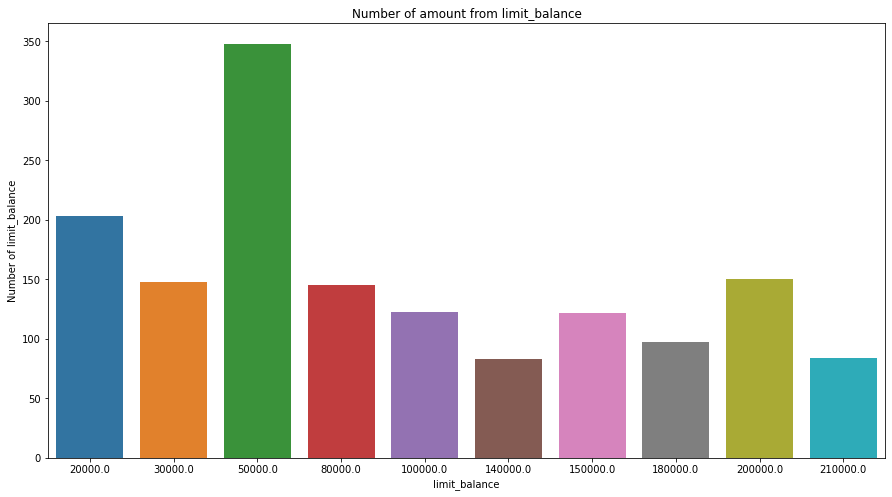

In [ ]:
#Melihat plot grafik 10 Limit Balance terbanyak
limit_balance_df = df['limit_balance'].value_counts().reset_index().rename(columns={'index': 'limit_balance','limit_balance': 'count of limit_balance'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=limit_balance_df['limit_balance'], y=limit_balance_df['count of limit_balance'])
plt.xlabel("limit_balance")
plt.ylabel("Number of limit_balance")
plt.title("Number of amount from limit_balance")

Limit balance kartu kredit yang paling banyak dimiliki oleh nasabah adalah sebesar 50.000 dollar, kemudian terbesar kedua adalah 20.000 dollar dan 200.000 dollar.

In [ ]:
#Melihat kategori kolom 'sex' atau jenis kelamin.

df[['sex']].value_counts()

sex
2      1802
1      1163
dtype: int64

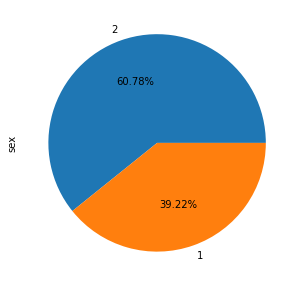

In [ ]:
#plot jenis kelamin menggunakan pie chart untuk melihat perbandingan dalam persen.
df['sex'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Terlihat bahwa pemegang kartu kredit 60.78% adalah perempuan dan 39.22% adalah laki-laki. Perempuan lebih banyak menggunakan kartu kredit dibandingkan dengan laki-laki.

In [ ]:
# Melihat apa saja jenis 'education level'

df['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0])

In [ ]:
# melihat jumlah masing-masing education level
df['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

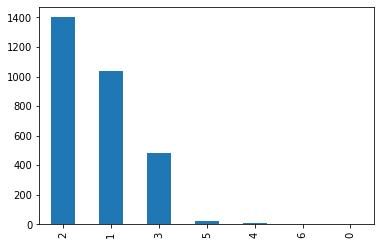

In [ ]:
# plot education_level menggunakan bar chart
df['education_level'].value_counts().plot(kind='bar')

Terlihat bahwa nasabah dengan tingkat pendidikan universitas merupakan pemegang kartu kredit terbanyak, diikuti oleh graduate school dan high school. Penjelasan masing-masing indeks adalah sebagai berikut:

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

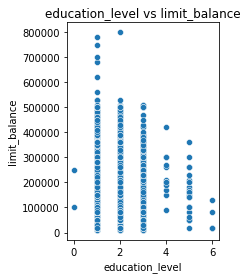

In [ ]:
# Melihat Persebaran tingkat pendidikan dengan limit balance yang dimiliki nasabah
plt.subplot(1, 2, 2)
sns.scatterplot(x='education_level', y='limit_balance', data=df)
plt.title('education_level vs limit_balance')
plt.show()

In [ ]:
#Melihat kategori apa saja pada kolom 'marital_status'
df['marital_status'].unique()

array([2, 1, 3, 0])

In [ ]:
#Melihat jumlah nasabah pada masing-masing kategori 'marital_status'
df['marital_status'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

Terdapat 4 kategori marital status, dimana 1=married, 2=single, 3=others, 0=tidak mengisi.

Text(0.5, 1.0, 'Number of  marital_status')

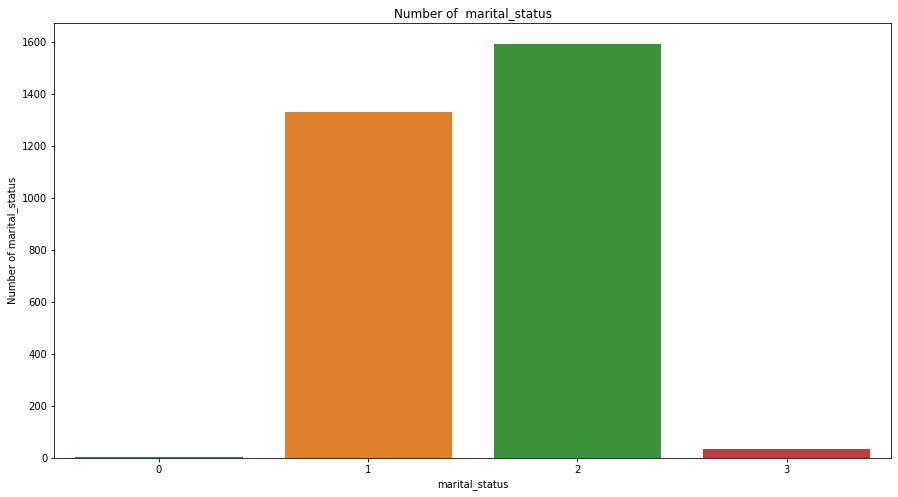

In [ ]:
#Melihat plot grafik 10 Limit Balance terbanyak
limit_balance_df = df['marital_status'].value_counts().reset_index().rename(columns={'index': 'marital_status','marital_status': 'count of marital_status'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=limit_balance_df['marital_status'], y=limit_balance_df['count of marital_status'])
plt.xlabel("marital_status")
plt.ylabel("Number of marital_status")
plt.title("Number of  marital_status")

In [ ]:
# Melihat detail rentang usia pemilik kartu kredit
df['age'].describe()

count    2965.000000
mean       35.193255
std         9.109439
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        69.000000
Name: age, dtype: float64

Terlihat usia minimal pemilik kartu kerdit adalah 21 tahun dan usia maksimalnya adalah 69 tahun, dengan rata-rata usia pemegang kartu kredit adalah 35 tahun.

In [ ]:
# Melihat jumlah kategori pada kolom 'pay_0'
df['pay_0'].nunique()

11

In [ ]:
# Melihat jumlah nasabah pada masing-masing kategori 'pay_0'
df['pay_0'].value_counts()

 0.0    1516
-1.0     540
 1.0     356
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64

Terdapat 11 tipe pada kolom 'pay_0', dimana masing-masing indeks dalam kolom tersebut menyatakan sebagai berikut : 


-2 = no consumption, -1 = pay duly, 0 = the use of revolving credit, 1 = payment delay for one month, 2 = payment delay for two months, 3 = payment delay for three months, 4 = payment delay for four months, 5 = payment delay for five months, 6 = payment delay for six months, 7 = payment delay for seven months dan 8 = payment delay for eight months.

Terlihat bahwa sebanyak 1.516 pengguna kredit aktif/kredit masih bergulir, 247 pemilik kartu kredit tidak menggunakan kartu kreditnya, 540 orang melakukan pembayaran dengan tertib dan sisanya adalah pemegang kartu kredit dengan keterlambatan pembayaran. Jika dilihat dalam grafik adalah sebagai berikut.
 

Text(0.5, 1.0, 'Number of  pay_0')

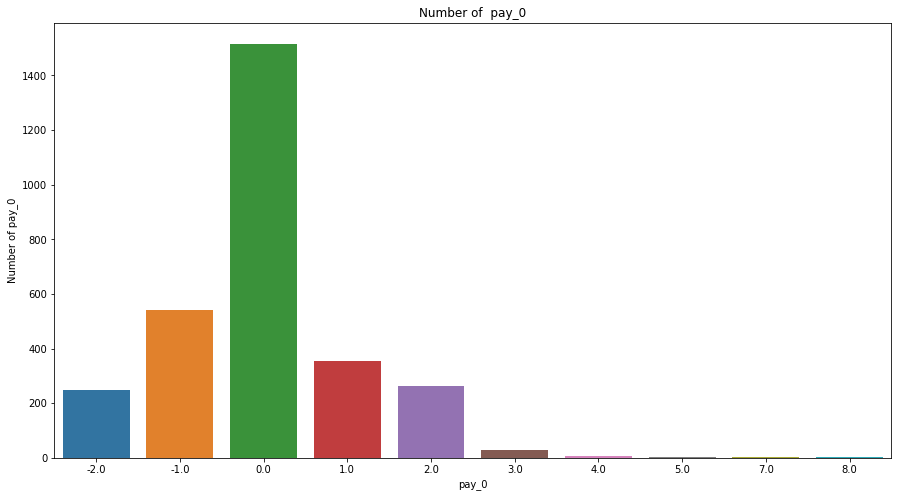

In [ ]:
#Melihat plot grafik 10 Limit Balance terbanyak
pay_0_df = df['pay_0'].value_counts().reset_index().rename(columns={'index': 'pay_0','pay_0': 'count of pay_0'})[:10]

plt.figure(figsize=(15, 8))
sns.barplot(x=pay_0_df['pay_0'], y=limit_balance_df['count of pay_0'])
plt.xlabel("pay_0")
plt.ylabel("Number of pay_0")
plt.title("Number of  pay_0")

In [ ]:
#Mengecek isi kolom 'bill amount'
df['bill_amt_1'].value_counts()

0.0         200
390.0        28
326.0         8
396.0         8
780.0         6
           ... 
254065.0      1
51734.0       1
11618.0       1
196931.0      1
379.0         1
Name: bill_amt_1, Length: 2643, dtype: int64

Kolom bill amaount berisi tentang jumlah tagihan kartu kredit. Dimana masing-masing kolom adalah sebagai berikut:

- bill_amt_1 : tagihan bulan September
- bill_amt_2 : tagihan bulan Agustus
- bill_amt_3 : tagihan bulan Juli
- bill_amt_4 : tagihan bulan Juni
- bill_amt_5 : tagihan bulan Mei
- bill_amt_6 : tagihan bulan April

In [ ]:
#mengecek jumlah masing-masing 'default_payment_next_month' yang akan kita gunakan sebagai target
df['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

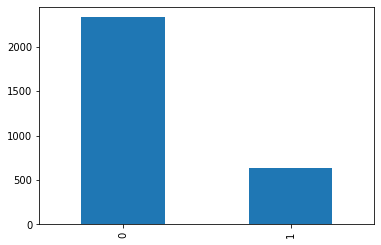

In [ ]:
df['default_payment_next_month'].value_counts().plot(kind='bar')

Kolom 'default_payment_next_month' berisi tentang pembayaran bawaan di bulan depan, dimana 1 adalah yes dan 0 adalah no. Kolom ini selanjutnya akan kita gunakan sebagai target untuk diprediksi bagaimana karakteristik nasabah dalam melakukan pembayaran kartu kredit di bulan selanjutnya.

In [ ]:
pd.set_option('display.max_rows', 93)
df.groupby(by=["default_payment_next_month","pay_0"]).education_level.agg(["count"])

count
default_payment_next_month pay_0       
0                          -2.0     213
                           -1.0     474
                            0.0    1319
                            1.0     245
                            2.0      69
                            3.0       3
                            4.0       3
                            5.0       2
                            6.0       1
                            8.0       1
1                          -2.0      34
                           -1.0      66
                            0.0     197
                            1.0     111
                            2.0     193
                            3.0      26
                            4.0       4
                            7.0       2
                            8.0       2

Dari tabel di atas kita dapat melihat jumlah pemilik kartu kredit berdasarkan pembayaran bawaan bulan depan dan karakteristik pembayaran pada bulan sebelumnya. Dimana definisi angka 0 dan 1 pada 'default_payment_next_month' dan definisi angka -2 hingga 8 pada 'pay_0' dapat dilihat pada penjelasan sebelumnya tersebut di atas.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Get Data for Model Inference

In [4]:
# Mengambil Data untuk Model Inference, sebanyak 10 data.
data_inf = df.sample(10, random_state=1) #1 adalah angka dipilih random, supaya data tidak berubah2
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1765,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,...,47951.0,41563.0,36779.0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0,1
525,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,...,14852.0,18669.0,25175.0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0,0
1456,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,...,4790.0,6388.0,5816.0,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0,0
929,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,...,97722.0,101082.0,103202.0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0,0
854,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,85282.0,87070.0,88828.0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0,0
1178,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
2828,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,...,0.0,333.0,183.0,7900.0,0.0,0.0,333.0,0.0,1500.0,0
1442,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,...,3234.0,4696.0,7062.0,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0,0
1131,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,...,70542.0,65765.0,58355.0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0,0
2583,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,7819.0,332.0,16516.0,9318.0,5343.0,7819.0,332.0,16516.0,5000.0,0


In [5]:
# Memisahkan Inference-Set dari Dataset
data_train_test = df.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [6]:
#Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,...,47951.0,41563.0,36779.0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0,1
1,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,...,14852.0,18669.0,25175.0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0,0
2,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,...,4790.0,6388.0,5816.0,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0,0
3,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,...,97722.0,101082.0,103202.0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0,0
4,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,85282.0,87070.0,88828.0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0,0
5,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
6,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,...,0.0,333.0,183.0,7900.0,0.0,0.0,333.0,0.0,1500.0,0
7,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,...,3234.0,4696.0,7062.0,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0,0
8,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,...,70542.0,65765.0,58355.0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0,0
9,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,7819.0,332.0,16516.0,9318.0,5343.0,7819.0,332.0,16516.0,5000.0,0


## Splitting between 'X' (Features) and y (Target)

In [7]:
#Split between 'X' (Features) and 'y' (Target)

X = data_train_test.drop('default_payment_next_month', axis = 1)
y = data_train_test['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [8]:
#melihat kolom y
y

0       0
1       0
2       0
3       0
4       0
       ..
2950    0
2951    0
2952    0
2953    1
2954    0
Name: default_payment_next_month, Length: 2955, dtype: int64

In [8]:
# Membagi data Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2068, 23)
Test Size :  (887, 23)


## Handling Outliers

In [111]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini mengambil dataframe (df) dan variable yang akan dilihat distribusinya

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

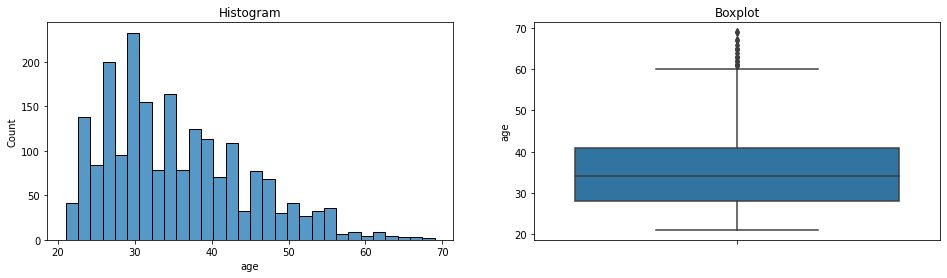


Skewness Value :  0.7700745195823206


In [112]:
# variabel yang digunakan adalah 'age' dari data X_train

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

In [113]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

In [114]:
# calculate boundaries for age
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'age')
upper_boundary, lower_boundary

(62.67664293725706, 7.890088203942174)

In [115]:
print('Total nasabah: {}'.format(len(X_train)))
print('Nasabah dengan usia > 62 tahun (right end outliers) : {}'.format(len(X_train[X_train['age'] > upper_boundary])))
print('Nasabah dengan usia < 7.8 tahun (left end outliers)  : {}'.format(len(X_train[X_train['age'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['age'] > upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['age'] < lower_boundary]) / len(X_train) * 100))

Total nasabah: 2068
Nasabah dengan usia > 62 tahun (right end outliers) : 12
Nasabah dengan usia < 7.8 tahun (left end outliers)  : 0

% right end outliers : 0.5802707930367506
% left end outliers  : 0.0


Dari hasil pengecekan outlier pada 'age' terdapat 12 nasabah yang berusia di atas 62 tahun. Sedangkan dari hasil EDA usia maksimal nasabah pemilik kartu kredit adalah 69 tahun. Hal ini masih dianggap wajar, karena setiap nasabah memiliki kondisi finansial yang berbeda-beda.

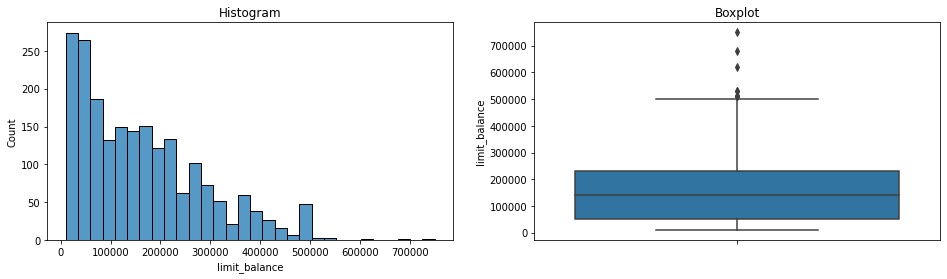


Skewness Value :  0.9423652752605016


In [116]:
# variabel yang digunakan adalah 'limit balance' dari data X_train

diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value : ', X_train['limit_balance'].skew())

In [117]:
# calculate boundaries for limit_balance
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'limit_balance')
upper_boundary, lower_boundary

(532227.9851649553, -205932.04706050648)

In [118]:
print('Total nasabah: {}'.format(len(X_train)))
print('Nasabah dengan limit balance > 532228 dollar (right end outliers) : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary])))
print('Nasabah dengan limit balance < -205932 (left end outliers)  : {}'.format(len(X_train[X_train['limit_balance'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['limit_balance'] < lower_boundary]) / len(X_train) * 100))

Total nasabah: 2068
Nasabah dengan limit balance > 532228 dollar (right end outliers) : 3
Nasabah dengan limit balance < -205932 (left end outliers)  : 0

% right end outliers : 0.14506769825918764
% left end outliers  : 0.0


Pengecekan outlier pada limit balance menunjukkan bahwa terdapat 3 orang nasabah dengan limit di atas 532.228 dollar. Sedangkan dari hasil EDA kita melihat bahwa limit balance di atas 532.228 dollar adalah 750.000 dollar, 780.000 dollar dan 800.000 dollar. Hal ini bisa saja terjadi, karena dalam pemberian limit kartu kredit, disesuaikan dengan kondisi/tingkat finansial masing-masing nasabah. 

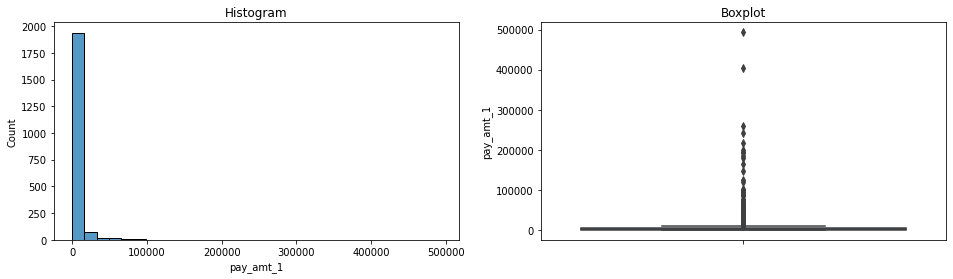


Skewness Value :  12.207606518236839


In [119]:
# variabel yang digunakan adalah 'pay_amt_1' dari data X_train

diagnostic_plots(X_train, 'pay_amt_1')
print('\nSkewness Value : ', X_train['pay_amt_1'].skew())

In [120]:
# calculate boundaries for pay_amt_1
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'pay_amt_1')
upper_boundary, lower_boundary

(72459.49980542176, -59376.14584023801)

In [121]:
print('Total nasabah: {}'.format(len(X_train)))
print('Nasabah dengan pembayaran di bulan September > 72459 dollar (right end outliers) : {}'.format(len(X_train[X_train['pay_amt_1'] > upper_boundary])))
print('Nasabah dengan pembayaran di bulan September < -59376 (left end outliers)  : {}'.format(len(X_train[X_train['pay_amt_1'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['pay_amt_1'] > upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['pay_amt_1'] < lower_boundary]) / len(X_train) * 100))

Total nasabah: 2068
Nasabah dengan pembayaran di bulan September > 72459 dollar (right end outliers) : 23
Nasabah dengan pembayaran di bulan September < -59376 (left end outliers)  : 0

% right end outliers : 1.1121856866537718
% left end outliers  : 0.0


Hasil pengecekan outlier pada 'pay_amt_1' atau pembayaran di bulan September, menunjukkan bahwa terdapat 23 nasabah dengan total pembayaran lebih dari 72.459 dollar. Selanjutnya, mari kita lihat lebih detail 23 nasabah dengan total pembayaran lebih dari 72.459 dollar di bulan September ini.

In [122]:
X_train[X_train['pay_amt_1'] > 72459]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2495,310000.0,2,2,2,42.0,-2.0,-1.0,0.0,0.0,0,...,250249.0,254254.0,259960.0,265702.0,260000.0,10000.0,10000.0,10000.0,10000.0,10000.0
1448,200000.0,2,3,1,38.0,0.0,0.0,0.0,-1.0,-1,...,109495.0,13785.0,22173.0,10482.0,101796.0,29894.0,13943.0,21865.0,0.0,26218.0
2516,50000.0,1,2,2,34.0,0.0,-1.0,0.0,0.0,0,...,49805.0,27605.0,29447.0,30045.0,91000.0,1200.0,600.0,29057.0,1076.0,1300.0
2535,120000.0,2,3,2,50.0,0.0,-1.0,0.0,0.0,0,...,120047.0,100637.0,79613.0,79286.0,125000.0,4065.0,4000.0,3000.0,3000.0,3000.0
1515,170000.0,1,2,2,29.0,0.0,0.0,0.0,0.0,-1,...,164405.0,93983.0,2806.0,1732.0,164000.0,7000.0,5215.0,3500.0,2000.0,300.0
2677,250000.0,2,1,2,36.0,-1.0,-1.0,-1.0,-1.0,-1,...,6341.0,174.0,1676.0,388.0,72534.0,6456.0,174.0,1682.0,2.0,0.0
2416,150000.0,2,2,1,27.0,-1.0,-1.0,0.0,0.0,0,...,149350.0,149984.0,130610.0,121793.0,147314.0,7752.0,6046.0,2753.0,5583.0,6700.0
1989,350000.0,2,2,1,32.0,-2.0,-2.0,-1.0,0.0,0,...,8111.0,198877.0,191248.0,183157.0,242247.0,8111.0,198748.0,7000.0,6509.0,7022.0
2515,180000.0,2,1,2,38.0,0.0,-1.0,0.0,0.0,0,...,180360.0,177460.0,140738.0,141830.0,180040.0,8200.0,9607.0,5103.0,5237.0,5000.0
2786,360000.0,1,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-1,...,795.0,1000.0,6398.0,9418.0,100496.0,799.0,1005.0,6398.0,3020.0,3040.0


Tabel yang tertampil di atas menunjukkan detail nasabah dengan total pembayaran lebih dari 72.459 dollar. Jika kita melihat limit balance pada masing-masing nasabah tersebut, hal ini menjadi wajar jika total pembayaran di atas 72.459 dollar, karena limit kartu kredit nasabah tersebut lebih besar daripada jumlah pembayaran mereka di bulan September. Namun terdapat satu nasabah dengan pembayaran yang sedikit melebihi limit balancenya yaitu total bayar 83.750 dollar sedangkan limit kartu kreditnya adalah 80.000 dollar. Setelah kita periksa lebih lanjut, ternyata nasabah tersebut pada kolom 'pay_0' termasuk dalam kategori 1, dimana kategori 1 mengindikasikan adanya keterlambatan pembayaran/tidak bayar pada tagihan 1 bulan sebelumnya. Oleh karena itu, outlier disini tidak kita hapus.

## Missing Values

In [9]:
#melihat jumlah missing values pada kolom X_train
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [124]:
#melihat jumlah missing values pada kolom X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [125]:
y_train.isnull().sum()

0

In [126]:
y_test.isnull().sum()

0

Dari pengecekan missing values di atas, terlihat bahwa tidak terdapat missing values baik pada X_train, X_test, y_train dan y_test

In [10]:
#Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,...,47951.0,41563.0,36779.0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0,1
1,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,...,14852.0,18669.0,25175.0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0,0
2,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,...,4790.0,6388.0,5816.0,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0,0
3,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,...,97722.0,101082.0,103202.0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0,0
4,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,85282.0,87070.0,88828.0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0,0
5,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
6,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,...,0.0,333.0,183.0,7900.0,0.0,0.0,333.0,0.0,1500.0,0
7,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,...,3234.0,4696.0,7062.0,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0,0
8,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,...,70542.0,65765.0,58355.0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0,0
9,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,7819.0,332.0,16516.0,9318.0,5343.0,7819.0,332.0,16516.0,5000.0,0


## Feature Selection

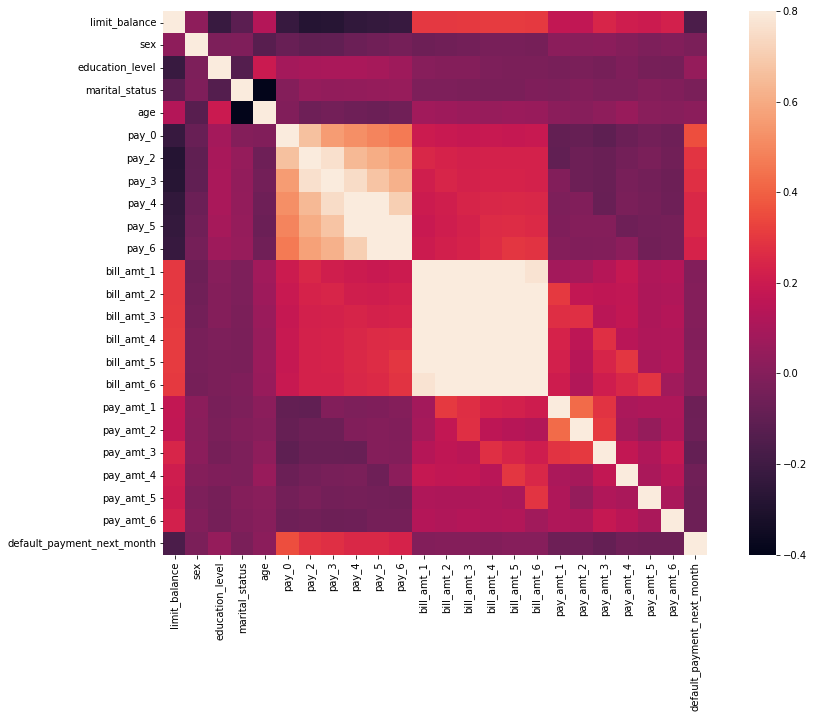

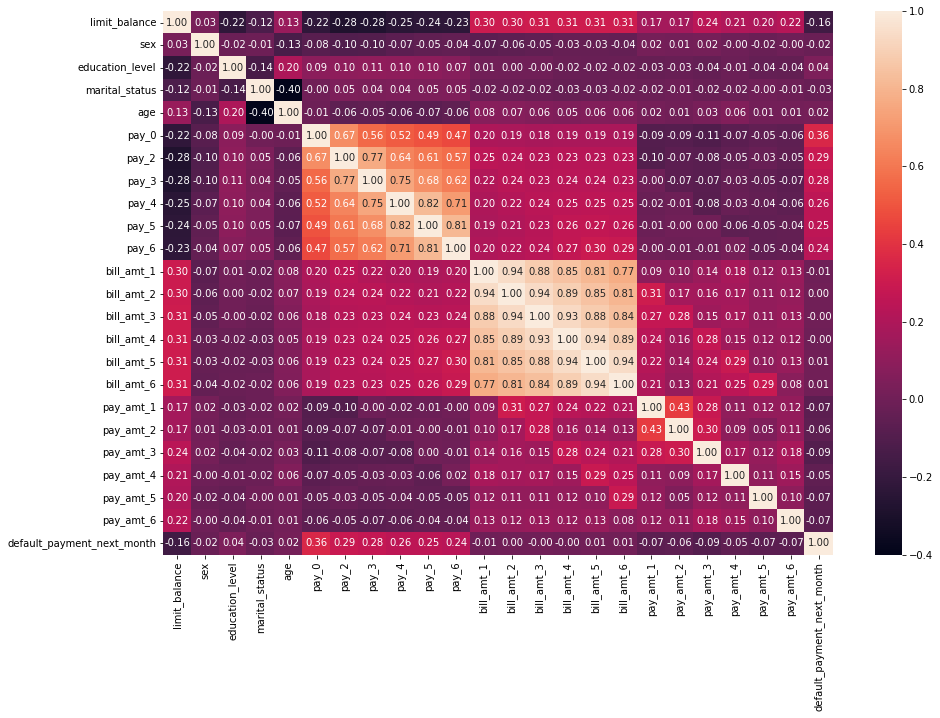

In [11]:
# Heatmap Correlation Matrix

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), vmax=.8, square=True);

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan grafik heatmap hubungan antara variabel dengan target, maka kita akan menghapus semua variabel 'bill amount', karena nilai korelasi masing-masing 'bill amount' terhadap 'default payment next month' sangat kecil bahkan 0.

In [11]:
#Menghapus kolom bill amount dari feature/variabel pada X_train
X_train.drop(['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], axis=1, inplace=True)
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1349,80000.0,2,2,2,24.0,0.0,0.0,2.0,2.0,2,2,6657.0,2629.0,0.0,6000.0,0.0,3000.0
1469,50000.0,1,3,2,40.0,0.0,0.0,0.0,0.0,-1,0,1747.0,1515.0,3076.0,20693.0,679.0,653.0
1999,80000.0,2,2,1,29.0,-2.0,-2.0,-1.0,2.0,2,-2,0.0,21197.0,0.0,0.0,0.0,0.0
2789,320000.0,1,1,2,34.0,-1.0,-1.0,-1.0,-1.0,-1,-1,2297.0,2203.0,3957.0,5557.0,3150.0,3056.0
1131,140000.0,2,2,2,26.0,0.0,0.0,0.0,0.0,0,0,8140.0,8000.0,4000.0,1917.0,3000.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,140000.0,1,1,2,32.0,0.0,0.0,2.0,2.0,2,2,5400.0,600.0,2400.0,3500.0,0.0,1539.0
356,280000.0,2,2,2,43.0,0.0,0.0,0.0,0.0,0,0,1527.0,1541.0,1192.0,1233.0,1239.0,1273.0
812,80000.0,1,3,1,45.0,0.0,0.0,0.0,0.0,0,0,1490.0,2000.0,2000.0,3000.0,5000.0,865.0
2180,150000.0,2,1,3,30.0,-2.0,-2.0,-2.0,-2.0,-2,-2,8589.0,2500.0,0.0,1380.0,0.0,2050.0


In [12]:
#Menghapus kolom bill amount dari feature/variabel pada X_test
X_test.drop(['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], axis=1, inplace=True)
X_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2331,150000.0,1,1,2,34.0,2.0,3.0,2.0,0.0,0,0,0.0,0.0,2535.0,5000.0,5000.0,3000.0
2477,210000.0,2,1,2,31.0,-1.0,-1.0,-1.0,0.0,0,-1,10000.0,19875.0,50000.0,15456.0,10625.0,213.0
798,50000.0,2,2,2,56.0,0.0,0.0,0.0,0.0,0,0,2180.0,2204.0,656.0,2159.0,678.0,851.0
2159,360000.0,2,2,1,52.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,207.0
2630,80000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1,-1,1396.0,18754.0,5449.0,2059.0,5798.0,3098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,50000.0,2,3,1,31.0,0.0,0.0,0.0,0.0,0,-2,1652.0,1906.0,1000.0,0.0,0.0,0.0
602,130000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0,0,5400.0,3100.0,3100.0,3200.0,3000.0,3100.0
1339,150000.0,2,1,2,32.0,0.0,0.0,0.0,0.0,2,2,2003.0,2000.0,3419.0,13.0,2088.0,9.0
1790,40000.0,2,3,2,55.0,1.0,2.0,2.0,2.0,2,2,2000.0,0.0,3000.0,0.0,2382.0,0.0


Kita sudah menghapus 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5' dan 'bill_amt_6 dari feature untuk model prediksi. Selanjutnya kita akan mencoba beberapa baseline model untuk kita lihat model mana yang paling baik dalam memprediksi. Setelah itu, satu model terbaik yang kita pilih tersebut, kita tambahkan hypeparameter dan kita bandingkan hasilnya dengan baseline model tanpa hyperparameter.

# Logistic Regression

## 6.1 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



In [19]:
log_model = LogisticRegression()

## 7.1 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



In [20]:
# Melatih model pada data y_train

log_model.fit(X_train, y_train)

LogisticRegression()

## 8.1 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [21]:
# Predict Train-Set and Test - Set

y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
#Melihat hasil cross validation mean dan std
print(cross_val_score(log_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(log_model, X_train, y_train, cv = 5).std())


0.7862652209004457
0.005483987424441725


In [23]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.7838491295938105
accuracy score test :  0.7891770011273957


In [47]:
#Menampilkan classification report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1621
           1       0.00      0.00      0.00       447

    accuracy                           0.78      2068
   macro avg       0.39      0.50      0.44      2068
weighted avg       0.61      0.78      0.69      2068



1. Hasil cross validation berdasarkan mean adalah sebesar 0.7862652209004457 dan hasil cross validation berdasarkan standar deviasai adalah 0.005483987424441725.
2. Berdasarkan nilai akurasi, model **good-fit** karena tidak terdapat gap yang besar antara akurasi skor data train dan data testnya.

# SVM

##6.2 - Model Definition

In [24]:
#Model Definition
SVM_model = SVC()

## 7.2 - Model Training

In [25]:
# Melatih model pada data y_train

SVM_model.fit(X_train, y_train)

SVC()

## 8.2 - Model Evaluation

In [32]:
# Predict Train-Set and Test - Set

y_pred_train1 = SVM_model.predict(X_train)
y_pred_test1 = SVM_model.predict(X_test)
y_pred_train1

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# Melihat cross validation score
print(cross_val_score(SVM_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(SVM_model, X_train, y_train, cv = 5).std())

0.7838497619632477
0.0010309976882474903


In [33]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train1))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test1))

accuracy score train :  0.7838491295938105
accuracy score test :  0.7891770011273957


In [48]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1621
           1       0.00      0.00      0.00       447

    accuracy                           0.78      2068
   macro avg       0.39      0.50      0.44      2068
weighted avg       0.61      0.78      0.69      2068



1. Hasil cross validation model SVM berdasarkan mean adalah sebesar 0.7838497619632477 dan berdasrkan standar deviasi adalah 0.0010309976882474903.
2. Model **good-fit** karena skor perbandingan data y_train dan y_test tidak berbeda jauh.

# Decision Tree Classifier

## 6.3 - Model Definition

In [13]:
#model definition
DT_model = DecisionTreeClassifier()

## 7.3 - Model Training

In [34]:
# Melatih model pada data y_train

DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 8.3 Model Evaluation

In [35]:
# Predict Train-Set and Test - Set

y_pred_train2 = DT_model.predict(X_train)
y_pred_test2 = DT_model.predict(X_test)
y_pred_train2

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
# Melihat cross validation score
print(cross_val_score(DT_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(DT_model, X_train, y_train, cv = 5).std())

0.7287258307892059
0.0247208024567074


In [37]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train2))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test2))

accuracy score train :  1.0
accuracy score test :  0.7474633596392334


In [49]:
# menampilkan classification report
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1621
           1       1.00      1.00      1.00       447

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



[Text(0.7162842674484821, 0.9821428571428571, 'pay_0 <= 1.5\ngini = 0.339\nsamples = 2068\nvalue = [1621, 447]'),
 Text(0.5095589609210948, 0.9464285714285714, 'pay_5 <= 1.0\ngini = 0.263\nsamples = 1852\nvalue = [1564, 288]'),
 Text(0.24325573014912624, 0.9107142857142857, 'limit_balance <= 45000.0\ngini = 0.234\nsamples = 1722\nvalue = [1489, 233]'),
 Text(0.08211552834822224, 0.875, 'sex <= 1.5\ngini = 0.376\nsamples = 199\nvalue = [149, 50]'),
 Text(0.04031747161618678, 0.8392857142857143, 'limit_balance <= 15000.0\ngini = 0.449\nsamples = 91\nvalue = [60, 31]'),
 Text(0.023689361853578676, 0.8035714285714286, 'age <= 26.0\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.0200448446453358, 0.7678571428571429, 'age <= 23.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.016400327437092927, 0.7321428571428571, 'bill_amt_5 <= 123.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.012755810228850055, 0.6964285714285714, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text

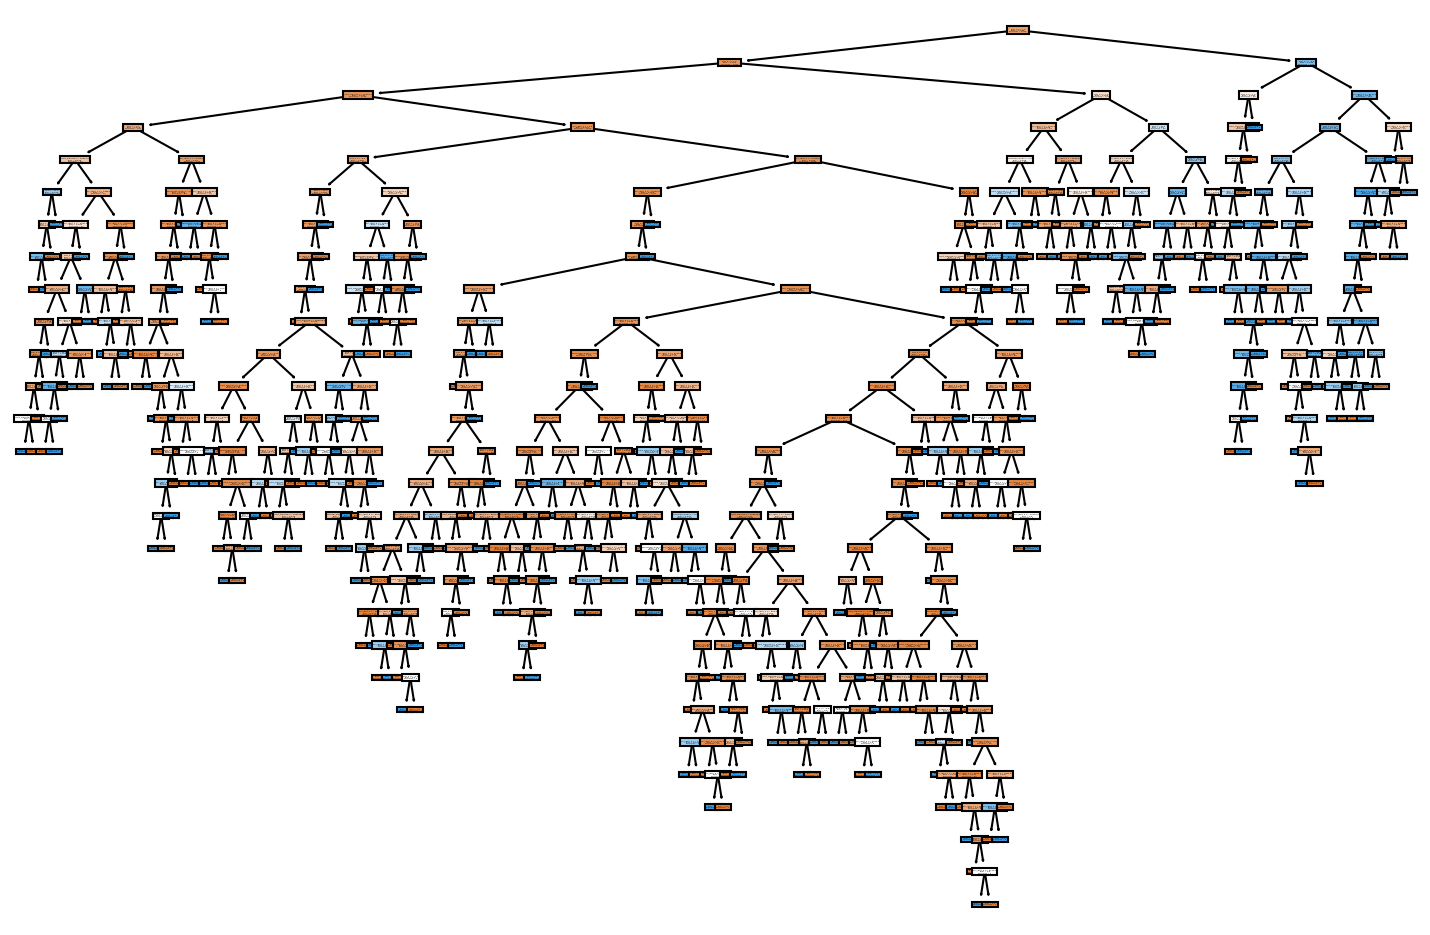

In [17]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DT_model,filled=True,feature_names=X.columns)

1. Hasil cross validation Decision Tree Model berdasarkan nilai mean adalah 0.7287258307892059 dan standar deviasinya adalah 0.0247208024567074.
2. Model **Over-fit** karena gap yang besar antara data train dan testnya.
3. Hasil plot grafik Decision Tree juga terlihat banyak sekali cabang, hal ini juga menunjukkan bahwa model over-fit, dan hasil modelnya kurang baik. Hal ini terjadi karena model yang digunakan adalah baseline model tanpa adanya pruning.

# Random Forest

## 6.4 - Model Definition

In [38]:
#model definition
randf_model = RandomForestClassifier(random_state=1)

## 7.4 - Model Training

In [39]:
# Melatih model pada data y_train

randf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

## 8.4 - Model Evaluation

In [40]:
# Predict Train-Set and Test - Set

y_pred_train3 = randf_model.predict(X_train)
y_pred_test3 = randf_model.predict(X_test)
y_pred_train3

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
print(cross_val_score(randf_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(randf_model, X_train, y_train, cv = 5).std())

0.8244750909452456
0.00742201831918663


In [42]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train3))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test3))

accuracy score train :  1.0
accuracy score test :  0.8320180383314544


In [50]:
#Menampilkan calssification report
print(classification_report(y_train,y_pred_train3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1621
           1       1.00      1.00      1.00       447

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



1. Hasil cross validation model Random Forest berdasarkan mean adalah sebesar 0.8244750909452456 dan standar deviasi sebesar 0.00742201831918663.
2. Model **over-fit** karena terdapat gap yang besar antara nilai akurasi data train dan data set.

# KNN

## 6.5 - Model Definition

In [43]:
##model definition
knn_model = KNeighborsClassifier()

## 7.5 - Model Training

In [44]:
# Melatih model pada data y_train

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 8.5 - Model Evaluation

In [45]:
# Predict Train-Set and Test - Set

y_pred_train4 = knn_model.predict(X_train)
y_pred_test4 = knn_model.predict(X_test)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menampilkan cross validation score
print(cross_val_score(knn_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(knn_model, X_train, y_train, cv = 5).std())

0.7567814155876056
0.02458700199961081


In [46]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train4))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test4))

accuracy score train :  0.8157640232108317
accuracy score test :  0.7553551296505073


In [51]:
#Menampilkan calssification report
print(classification_report(y_train,y_pred_train4))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1621
           1       0.67      0.29      0.40       447

    accuracy                           0.82      2068
   macro avg       0.75      0.62      0.65      2068
weighted avg       0.80      0.82      0.79      2068



1. Hasil cross validation KNN Model berdasarkan nilai mean adalah 0.7567814155876056 dan standar deviasi sebesar 0.02458700199961081
2. Model **over-fit** karena terdapat selisih antara akurasi skor data train data setnya.

# Naive Bayes

## 6.6 - Model Definition

In [53]:
# model definition
nb_model = GaussianNB()


## 7.6 - Model Training

In [54]:
# Melatih model pada data y_train

nb_model.fit(X_train, y_train)

GaussianNB()

## 8.6 - Model Evaluation

In [55]:
# Predict Train-Set and Test - Set

y_pred_train5 = nb_model.predict(X_train)
y_pred_test5 = nb_model.predict(X_test)
y_pred_train5

array([1, 1, 0, ..., 1, 1, 1])

In [56]:
#Melihat Cross validation score
print(cross_val_score(nb_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(nb_model, X_train, y_train, cv = 5).std())

0.35976184627621616
0.01740509541295291


In [57]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train5))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test5))

accuracy score train :  0.3554158607350097
accuracy score test :  0.36302142051860203


In [58]:
#Menampilkan calssification report
print(classification_report(y_train,y_pred_train5))

              precision    recall  f1-score   support

           0       0.88      0.21      0.34      1621
           1       0.24      0.89      0.37       447

    accuracy                           0.36      2068
   macro avg       0.56      0.55      0.35      2068
weighted avg       0.74      0.36      0.34      2068



1. Hasil cross validation KNN Model berdasarkan nilai mean adalah 0.35976184627621616 dan std 0.01740509541295291
2. Model **good-fit** karena gap kecil pada akurasi skor data train dan data set.

# Bagging Classifier

## 6.8 - Model Definition

In [60]:
bag_clf_model = BaggingClassifier()

## 7.8 - Model Training

In [61]:
# Melatih model pada data y_train

bag_clf_model.fit(X_train, y_train)

BaggingClassifier()

## 8.8 - Model Evaluation

In [62]:
# Predict Train-Set and Test - Set

y_pred_train6 = bag_clf_model.predict(X_train)
y_pred_test6 = bag_clf_model.predict(X_test)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
# Melihat cross validation score
print(cross_val_score(bag_clf_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(bag_clf_model, X_train, y_train, cv = 5).std())

0.8181867097121336
0.008600066569311345


In [64]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train6))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test6))

accuracy score train :  0.9792069632495164
accuracy score test :  0.8196166854565953


In [65]:
#Menampilkan calssification report
print(classification_report(y_train,y_pred_train6))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1621
           1       0.99      0.91      0.95       447

    accuracy                           0.98      2068
   macro avg       0.98      0.95      0.97      2068
weighted avg       0.98      0.98      0.98      2068



1. Hasil cross validation pada Bagging Classifier Model berdasarkan nilai mean adalah 0.8181867097121336 dan std deviasinya sebesar 0.008600066569311345
2. Model **Over-Fit** karena terdapat gap pada akurasi skor data train dan data testnya.

# Hyperparameter Tuning with GridSearchCV

In [66]:
#memberikan input pada hyperparameter yang akan digunakan
param_grid = {'n_estimators': [80, 100, 120],
              'criterion':['gini','entropy'],
               'max_features': ['auto','log2'],
               'max_depth': [10,20],
               'min_samples_split': [2, 5, 1],
               'min_samples_leaf': [1, 2, 4],
               }
param_grid

{'n_estimators': [80, 100, 120],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'log2'],
 'max_depth': [10, 20],
 'min_samples_split': [2, 5, 1],
 'min_samples_leaf': [1, 2, 4]}

In [72]:
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=5, verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 1],
                         'n_estimators': [80, 100, 120]},
             verbose=2)

In [73]:
#mencari hyperparameter terbaik
best_grid = grid_search.best_estimator_

In [74]:
best_grid

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=120,
                       random_state=1)

In [75]:
#melakukan prediksi dengan best grid yang didapatkan
y_pred_train7 = best_grid.predict(X_train)
y_pred_test7 = best_grid.predict(X_test)

In [76]:
#melihat nilai skor akurasinya
print(cross_val_score(bag_clf_model, X_train, y_train, cv = 5).mean())
print(cross_val_score(bag_clf_model, X_train, y_train, cv = 5).std())

0.8094805301142809
0.004663410426223685


In [77]:
#Melihat akurasi skor pada data train dan test
print('accuracy score train : ',accuracy_score(y_train,y_pred_train7))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test7))

accuracy score train :  0.8762088974854932
accuracy score test :  0.8399098083427283


In [78]:
#Menampilkan calssification report
print(classification_report(y_train,y_pred_train7))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1621
           1       0.90      0.48      0.63       447

    accuracy                           0.88      2068
   macro avg       0.89      0.73      0.78      2068
weighted avg       0.88      0.88      0.86      2068



Dari hasil percobaan 7 baseline model di atas, hasil akurasi cross validation terbaik berdasarkan nilai meannya adalah pemodelan menggunakan algoritma  **Random Forest Classifier**. Nilai akurasi mean dan standar deviasinya masing - masing adalah sebesar:
  - mean: 0.8244750909452456 (82%)
  - std: 0.00742201831918663


Setelah dilakukan hyperparameter tuning pada Random Forest Classifier, nilai mean dan std adalah masing-masing sebesar:
  - mean : 0.8094805301142809 (80%)
  - std : 0.004663410426223685


Hasil cross validation Random Forest setelah ditambahkan hyperparameter, lebih rendah dibandingkan baseline modelnya. Namun, model menjadi **good-fit** dikarenakan gap akurasi skor pada data train dan data setnya menjadi lebih kecil dibandingkan sebelum diberikan hyperparameter.

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [86]:
# Menyimpan file model


with open('randf_model.pkl', 'wb') as file_1 :
  joblib.dump(randf_model, file_1)



In [87]:
#Load all files


with open('randf_model.pkl', 'rb') as file_1:
  randf_model = joblib.load(file_1)


In [88]:
#Menampilkan Data Inference

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,...,47951.0,41563.0,36779.0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0,1
1,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,...,14852.0,18669.0,25175.0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0,0
2,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,...,4790.0,6388.0,5816.0,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0,0
3,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,...,97722.0,101082.0,103202.0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0,0
4,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,85282.0,87070.0,88828.0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0,0
5,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
6,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,...,0.0,333.0,183.0,7900.0,0.0,0.0,333.0,0.0,1500.0,0
7,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,...,3234.0,4696.0,7062.0,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0,0
8,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,...,70542.0,65765.0,58355.0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0,0
9,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,7819.0,332.0,16516.0,9318.0,5343.0,7819.0,332.0,16516.0,5000.0,0


In [98]:
#memisahkan target data inference
data_inf_ = data_inf.drop('default_payment_next_month', axis=1)
y_inf = data_inf['default_payment_next_month']

In [100]:
data_inf_ 

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0
1,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0
2,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,-1,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0
3,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0
4,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0
5,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0
6,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,2,7900.0,0.0,0.0,333.0,0.0,1500.0
7,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,-1,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0
8,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0
9,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,9318.0,5343.0,7819.0,332.0,16516.0,5000.0


In [101]:
#Memprediksi menggunakan random forest
y_pred_inf = randf_model.predict(data_inf_)
y_pred_inf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
# Mengubah kolom hasil prediksi dalam dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['default_payment_next_month Prediction'])
y_pred_inf_df

,default_payment_next_month Prediction
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [104]:
# Menggabungkan hasil prediksi dan target prediksi data inference ke dalam data inference
pd.concat([data_inf, y_inf, y_pred_inf_df], axis = 1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default_payment_next_month,default_payment_next_month Prediction
0,120000.0,2,2,2,43.0,2.0,2.0,0.0,0.0,0,0,0.0,3507.0,2000.0,2500.0,2000.0,1500.0,1,1,1
1,270000.0,2,2,1,27.0,0.0,0.0,0.0,2.0,0,0,4000.0,5000.0,0.0,10000.0,7000.0,2000.0,0,0,0
2,60000.0,2,2,1,40.0,0.0,0.0,0.0,-1.0,-1,-1,5000.0,1508.0,4790.0,6388.0,6046.0,17806.0,0,0,0
3,310000.0,2,1,1,45.0,0.0,0.0,0.0,0.0,0,0,3340.0,4370.0,4000.0,5000.0,3899.0,3761.0,0,0,0
4,340000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,0,3871.0,3136.0,3014.0,3123.0,3168.0,4855.0,0,0,0
5,160000.0,1,1,2,28.0,0.0,0.0,0.0,0.0,0,0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0,0,0
6,80000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-2.0,-1,2,7900.0,0.0,0.0,333.0,0.0,1500.0,0,0,0
7,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,-1,-1,5097.0,1060.0,1000.0,4696.0,7062.0,10898.0,0,0,0
8,380000.0,1,1,1,37.0,0.0,0.0,0.0,0.0,0,0,13014.0,5068.0,2100.0,1947.0,2000.0,1600.0,0,0,0
9,340000.0,2,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,-1,9318.0,5343.0,7819.0,332.0,16516.0,5000.0,0,0,0


# 10 - Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Setelah melakukan 7 percobaan model untuk membuat prediksi default_payment_next_month / pembayaran bulan depan, model dengan hasil terbaik didapatkan dengan menggunakan algoritma **Random Forest Classifier**.

2. Setelah dilakukan hyperparameter tuning pada algoritma Random Forest Classifier, ternyata nilai akurasi default Random Forest lebih baik daripada nilai akurasi score  Random Forest hyperparameter. Dimana akurasi skor Random Forest Classifier baseline adalah 0.8244750909452456 dan akurasi score Random Forest dengan hyperparameter adalah 0.8094805301142809. Namun, dengan memberikan hyperparameter, hasil prediksi menjadi good-fit, dibandingkan dengan baseline modelnya yang masih overt-fit.

Berikut ini adalah hasil perbandingan metrics pada masing-masing model berdasarkan nilai cross validationnya:

- Logistic Regression
  - accuracy score mean :0.7862652209004457
  - accuracy score std  :0.005483987424441725
- SVM
  - accuracy score mean :0.7838497619632477
  - accuracy score std  :0.0010309976882474903
- Decision Tree Classifier
  - accuracy score mean :0.7838497619632477
  - accuracy score std  :0.0010309976882474903
- Random Forest
  - accuracy score mean :0.8244750909452456
  - accuracy score std  :0.004058539337173952
- KNN
  - accuracy score mean :0.7567814155876056
  - accuracy score std  :0.02458700199961081
- Naive Bayes
  - accuracy score mean :0.35976184627621616
  - accuracy score std  :0.01740509541295291
- Bagging Classifier
  - accuracy score mean :0.8094805301142809
  - accuracy score std  :0.0025191099814357767

3. Kelebihan dan Kekurangan masing - masing model


  - Kelebihan Logistic Regression
    1. Regresi logistik lebih mudah diimplementasikan, diinterpretasikan, dan sangat efisien untuk dilatih.
    2. Akurasi yang baik untuk banyak kumpulan data sederhana dan berkinerja baik ketika kumpulan data dapat dipisahkan secara linier
    3. Dapat menginterpretasikan koefisien model sebagai indikator pentingnya fitur.


  - Kekurangan Logistic Regression
    1. Jika jumlah pengamatan lebih kecil dari jumlah fitur, Regresi Logistik tidak dapat digunakan karena dapat menyebabkan overfitting.
    2. Keterbatasan utama Regresi Logistik adalah asumsi linearitas antara variabel dependen dan variabel independen.
    3. Hanya dapat digunakan untuk memprediksi fungsi diskrit. Oleh karena itu, variabel terikat Regresi Logistik terikat pada himpunan bilangan diskrit.



  - Kelebihan KNN
    1. Mudah diterapkan karena kesederhanaan dan akurasi algoritma.

    2. Mudah beradaptasi
Saat sampel training baru ditambahkan, algoritma KNN menyesuaikan untuk ikut memperhitungkan data baru karena semua data pelatihan disimpan ke dalam memori.

    3. Memiliki sedikit hyperparameter
KNN hanya membutuhkan nilai k dan metrik jarak, yang relatif lebih sedikit jika dibandingkan dengan algoritma machine learning lainnya.

  - Kekurangan KNN
    1. Tidak berfungsi dengan baik pada dataset berukuran besar
Untuk dataset berukuran besar, cost untuk menghitung jarak antara titik baru dan setiap titik yang ada sangat besar dan cenderung menurunkan kinerja algoritma.

    2. Algoritma KNN tidak bekerja dengan baik pada data berdimensi tinggi karena dengan jumlah dimensi yang besar, menjadi sulit bagi algoritma untuk menghitung jarak di setiap dimensi.

    3. Kita perlu melakukan penskalaan fitur (standarisasi dan normalisasi) sebelum menerapkan algoritma KNN ke kumpulan data apa pun. Jika kita tidak melakukannya, KNN dapat menghasilkan prediksi yang salah.

    4. Sensitif terhadap noise data, missing values dan outliers.


  - Kelebihan Decision Tree
1. Mudah dipahami karena mengikuti proses yang sama seperti cara manusia saat membuat keputusan dalam kehidupan nyata.
2. Sangat berguna untuk memecahkan masalah terkait keputusan.
3. Membantu untuk memikirkan semua kemungkinan hasil untuk suatu masalah.
4. Data cleaning cenderung lebih sedikit dibandingkan dengan algoritma lain.


  - Kekurangan Decision Tree
1. Mengandung banyak layer yang membuat algoritma ini cukup rumit.
2. Dapat terjadi masalah overfitting, namun dapat diselesaikan dengan menggunakan algoritma Random Forest.
3. Untuk label kelas yang cenderung banyak, kompleksitas komputasi dari Decision tree dapat meningkat.



  - Kelebihan SVM

    1. Cocok untuk ruang dimensi tinggi
    2. Efektif untuk kasus dimana jumlah dimensi lebih besar dari jumlah sampel
    3. Hemat memori, karena menggunakan training point dari fungsi keputusan (support vector)
    4. Bekerja relatif baik ketika ada margin pemisahan yang jelas antar kelas.


  - Kekurangan SVM

    1. Algoritma SVM tidak cocok untuk dataset dalam jumlah yang besar karena membutuhkan waktu training yang lama.
    2. SVM tidak bekerja dengan baik ketika dataset memiliki lebih banyak noise misalnya kelas target terjadi tumpang tindih.
    3. Jika jumlah fitur untuk setiap titik data melebihi jumlah sampel data training, SVM akan memiliki performa yang kurang baik
    4. Karena support vector classifier bekerja dengan meletakkan titik data di atas dan di bawah hyperplane, tidak ada kejelasan probabilistik untuk klasifikasi tersebut. Hal ini dapat menyebabkan beban komputasi yang tinggi.


  - Kelebihan Algoritma Naive Bayes Classifier

    1. Sederhana dan mudah diterapkan
    2. Tidak membutuhkan banyak data pelatihan
    3. Menangani data kontinu dan diskrit
    5. Cepat dan dapat digunakan untuk membuat prediksi realtime

  - Kekurangan Algoritma Naive Bayes Classifier
    1. Naive Bayes mengasumsikan bahwa semua prediktor (atau fitur) adalah independen, sedangkan hal ini jarang terjadi dalam kehidupan nyata. Hal ini membatasi penerapan algoritma ini dalam kasus penggunaan di dunia nyata.
    2. Tidak berlaku jika probabilitas kondisionalnya adalah nol, apabila nol maka probabilitas prediksi akan bernilai nol juga
    

 - Kelebihan Algoritma Random Forest

    1. Kuat terhadap data outlier.
    2. Bekerja dengan baik dengan data non-linear.
    3. Risiko overfitting lebih rendah.
    4. Berjalan secara efisien pada kumpulan data yang besar.
    5. Akurasi yang lebih baik daripada algoritma klasifikasi lainnya.



  - Kekurangan Algoritma Random Forest
    1. Random Forest cenderung bias saat berhadapan dengan variabel kategorikal.
    2. Waktu komputasi pada dataset berskala besar relatif lambat
    3. Tidak cocok untuk metode linier dengan banyak fitur sparse

4. Dengan menggunakan model terbaik yang kita dapatkan yaitu model Algoritma Random Forest, kita mencoba memasukkan data baru ke dalam model tersebut. Data yang kita gunakan adalah data inference yang sudah kita pisahkan sebelumnya. Hasil prediksi yang diperoleh terlihat sangat baik, karena dapat memprediksi semua data dengan benar, sama persis dengan data aktual yang ada pada Data Inference.

5. Dari hasil EDA kita dapat melihat bahwa lebih banyak jumlah nasabah yang tidak melakukan pembayaran di bulan depan, dibandingkan dengan nasabah yang melakukan pembayaran. Dimana 2330 nasabah tergolong tidak membayar dan 635 nasabah tergolong membayar. Terlihat juga dari 10 sampel data inference dan juga hasil prediksinya, bahwa hanya terdapat 1 nasabah yang akan melakukan pembayaran di bulan selanjutnya dan 9 nasabah lainnya tidak melakukan pembayaran.

6. Dari poin kesimpulan nomor 5, juga sejalan dari hasil EDA dimana pada bulan sebelumnya terdapat 1516 nasabah dengan kredit aktif, tetapi hanya 540 nasabah yang melakukan pembayaran tepat waktu, dan sisanya tidak melakukan pembayaran.

7. Hasil EDA juga menunjukkan bahwa perempuan lebih banyak memiliki kartu kredit dibandingkan laki-laki, yaitu 60.78% perempuan dan 39.22% laki-laki.

8. Limit kartu kredit yang paling banyak dimiliki oleh nasabah adalah 50.000 dollar, dimana limit terendahnya adalah 20.000 dollar dan limit tertinggi yang dimiliki nasabah adalah 80.000 dollar.

9. Berdasarkan tingkat pendidikannya, ternyata pemilik kartu kredit terbanyak adalah nasabah dengan tingkat pendidikan Universitas. 



# Conceptual Problems

> Jawab pertanyaan berikut:

  1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!


  2. Apakah fungsi dari pruning pada Tree model?


  3. Bagaimana cara memilih K yang optimal pada KNN?


  4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

  
  5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

> Jawaban:

1. Fungsi criterion adalah untuk mengukur kualitas split pada Desicion Tree. Criterion yang dipilih bertujuan untuk mengoptimalkan nilai split dari decision tree. Salah satu jenis criterion adalah Gini. Kriteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Jenis lain dari criterion adalah Entropy dan Log loss. 

2. Ketika menggunakan Tree model, dapat terjadi overfit karena adanya cabang-cabang yang mengindikasikan outlier pada saat dilakukan training data. Pruning adalah memangkas/memotong cabang-cabang tersebut, dengan tujuan meningkatkan akurasi klasifikasi pada data. Setelah dilakukan pruning, biasanya model lebih cepat dan lebih baik dalam mengklasifikasikan data uji independen dengan benar daripada yang tidak dipruning.

3. KNN bekerja berdasarkan prinsip bahwa setiap titik data yang berdekatan satu sama lain akan berada di kelas yang sama. Dengan kata lain, KNN mengklasifikasikan titik data baru berdasarkan kemiripan. Adapun alur cara kerja algoritma KNN adalah sebagai berikut:

  - Pilih nilai banyaknya tetangga K

  - Hitung jarak dari jumlah tetangga K (bisa menggunakan salah satu metrik jarak, misalnya Euclidean distance)

  - Ambil tetangga terdekat K sesuai jarak yang dihitung.

  - Di antara tetangga k ini, hitung jumlah titik data di setiap kategori.

  -  Tetapkan titik data baru ke kategori yang jumlah tetangganya paling banyak.

  - Model sudah siap.


4. Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data training dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset training dan divalidasi oleh subset validasi

5. - Precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. Atau bisa juga dituliskan secara matemetis:
       P = TP / (TP+FP)


  - Recall, secara definisi adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. Dan dapat dituliskan secara matematis seperti ini:
      R = TP / (TP+FN)

  - F1 Score secara definisi adalah harmonic mean dari precision dan recall. Yang secara matematik dapat ditulis: 

      F1 = 1/F1 (1/Precision + 1/Recall)

      Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.



  - Akurasi adalah ukuran yang menentukan tingkat kemiripan antara hasil pengukuran dengan nilai yang sebenarnya diukur.




